# DataFrameとは

* DataFrameは、ラベル付き2次元のデータ構造である。
 * 要するに、表形式のデータを扱うためのデータ構造である。
 * これを行列、ないしは2次元配列と呼ぶこともある。

pandasでは行名をindex、列名をcolumnsと呼ぶ。
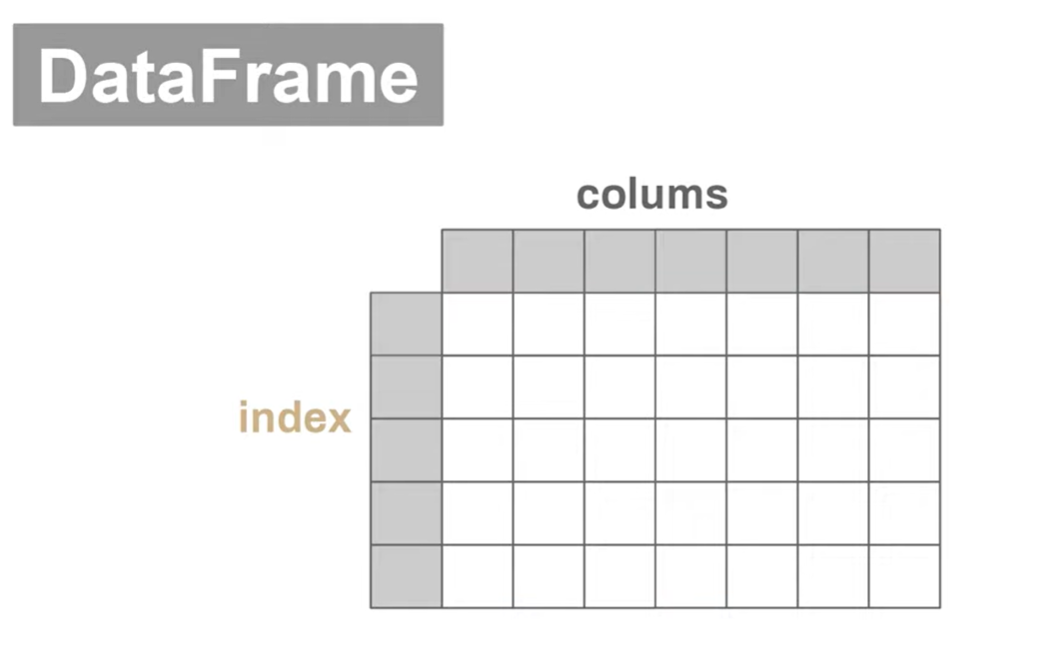

なお、Seriesはラベル付き1次元のデータ構造である。



## リストを使ったDataFrameの作成

In [1]:
import pandas as pd

matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

df = pd.DataFrame(matrix, index=['idx1', 'idx2', 'idx3'], columns=['col1', 'col2', 'col3'])
df

,col1,col2,col3
idx1,1,2,3
idx2,4,5,6
idx3,7,8,9


### Numpyのarrayを使ったDataFrameの作成

numpy : Pythonよりも高速な数値計算を行うためのライブラリ
numpy配列は、numpy.array()にリストを渡すことで作成できる。

In [2]:
import numpy as np

df = pd.DataFrame(
    np.random.randn(5, 3), 
    index=['idx1', 'idx2', 'idx3', 'idx4', 'idx5'], 
    columns=['col1', 'col2', 'col3']
)

df

,col1,col2,col3
idx1,-0.722411,-0.365070,0.778756
idx2,-0.280944,1.103256,1.328200
idx3,-0.173264,1.075318,0.198775
idx4,0.700364,0.515068,2.023106
idx5,-1.193969,-0.667369,-0.888120


## データの抽出

* 行名の取得
 * `DataFrame.index`で行名のリストを取得できる。
* 列名の取得
 * `DataFrame.columns`で列名のリストを取得できる。



In [3]:
df.index

Index(['idx1', 'idx2', 'idx3', 'idx4', 'idx5'], dtype='object')

In [4]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

## 辞書型を使ったDataFrameの作成

* キーが列名、値が列のデータとなるような辞書型を渡すことで、DataFrameを作成できる。
* この場合、行名は自動的に0から始まる整数になる。

行名を指定する場合は、index引数に行名のリストを渡す。

In [5]:
data = {
    'col1': [1, 2, 3],
    'col2': [4, 5, 6],
    'col3': [7, 8, 9]
}

df = pd.DataFrame(data, index=['idx1', 'idx2', 'idx3'])
df

,col1,col2,col3
idx1,1,4,7
idx2,2,5,8
idx3,3,6,9


## indexとcolumnsの操作

indexとcolumnの名前を変更するには、`DataFrame.rename()`を使う方法と、`DataFrame.index`や`DataFrame.columns`に直接代入する方法がある。
* 行名の変更
 * `DataFrame.rename(index={元の行名: 新しい行名})`⇒特定の行名を変更できる
* 列名の変更
 * `DataFrame.rename(columns={元の列名: 新しい列名})`⇒特定の列名を変更できる

In [6]:
df

,col1,col2,col3
idx1,1,4,7
idx2,2,5,8
idx3,3,6,9


In [8]:
#NOTE : デフォルトでは、pandas は元のDataFrameを変更せず、そのコピーの変換を返す。
#NOTE : そのため、元のDataFrameを変更したい場合は、inplace=True を指定する。
df.rename(columns={'col3' : 'x-c'}, inplace=True)
df.rename(index={'idx3' : 'x-i'}, inplace=True)
df

,col1,col2,x-c
idx1,1,4,7
idx2,2,5,8
x-i,3,6,9


## 列の取得

* 列名を指定して、列を取得するには、`DataFrame[列名]`とする。
* このとき、取得されるのはSeriesである。
* 複数の列を取得するには、`DataFrame[[列名1, 列名2, ...]]`とする。

In [10]:
df['x-c'] #type: pandas.core.series.Series. 1次元の場合はSeriesとなる。

idx1    7
idx2    8
x-i     9
Name: x-c, dtype: int64

In [12]:
df[['col1', 'col2']] #複数取得するとDataFrame型になる。

,col1,col2
idx1,1,4
idx2,2,5
x-i,3,6


In [13]:
type(df[['col1', 'col2']])

pandas.core.frame.DataFrame

## locメソッドでの抽出

列や行のラベルを指定して、データを抽出するには、`DataFrame.loc[行ラベル]`とする。
デフォルトでは、行データが取得される。
列データを取得するには、スライス記法もどきを使い、`DataFrame.loc[:, 列ラベル]`とする。

* 行データの取得：`DataFrame.loc[行ラベル]`
* 列データの取得：`DataFrame.loc[:, 列ラベル]`

In [14]:
df.loc['idx1']

col1    1
col2    4
x-c     7
Name: idx1, dtype: int64

In [15]:
df.loc[:, ['col1', 'col2']] #;は全部の行を取得するという意味

,col1,col2
idx1,1,4
idx2,2,5
x-i,3,6


In [16]:
df.loc['idx1', 'col1'] #特定の行と列の値を取得する。

1

## ilocメソッドでの抽出

行や列のラベルではなく、行番号や列番号を指定して、データを抽出するには、`DataFrame.iloc[行番号]`とする。
`;`などの扱いは、`loc`と同様である。

In [17]:
df.iloc[:, 0] #全部の行における、0番目の列の値を取得する。

idx1    1
idx2    2
x-i     3
Name: col1, dtype: int64

In [20]:
df.iloc[0,2] #0番目の行における、2番目の列の値を取得する。

7

## データの変更

ここまでのメソッドや指定方法を使って、DataFrameのデータを変更することができる。

* locメソッドを使ったデータの変更
 * `DataFrame.loc[行ラベル, 列ラベル] = 値`

In [21]:
df.loc[:, 'x-c'] = ['Tokyo', 'Osaka', 'Nagoya'] #3列目のデータをすべて変更
df

,col1,col2,x-c
idx1,1,4,Tokyo
idx2,2,5,Osaka
x-i,3,6,Nagoya


## get_.locによる行,列番号の取得

`DataFrame.index.get_loc(ラベル)`で、ラベルに対応する行番号を取得できる。

`DataFrame.columns.get_loc(ラベル)`で、ラベルに対応する列番号を取得できる。

In [23]:
df.index.get_loc('idx1') #idx1の行番号を取得する。

0

In [27]:
df.columns.get_loc("col1") #col1の列番号を取得する。

0

これらを組み合わせて、データの変更もできる。

In [30]:
df.iloc[:,df.columns.get_loc("col1")] #col1の列を取得する。

idx1    1
idx2    2
x-i     3
Name: col1, dtype: int64

In [31]:
df.iloc[:, df.columns.get_loc("col1")] = [100, 200, 300] #col1の列をすべて変更する。
df

,col1,col2,col3
idx1,100,4,Tokyo
idx2,200,5,Osaka
x-i,300,6,Nagoya


## データの型を調べる

* `DataFrame.dtypes`で、列ごとのデータ型を調べることができる。

In [32]:
df.dtypes

col1     int64
col2     int64
col3    object
dtype: object

## 行列サイズの取得

* `DataFrame.shape`で、行数と列数を取得できる。

In [33]:
df.shape

(3, 3)

## 転置行列の取得

* `DataFrame.T`で、転置行列を取得できる。


In [34]:
df.T

,idx1,idx2,x-i
col1,100,200,300
col2,4,5,6
col3,Tokyo,Osaka,Nagoya


## 練習問題

In [35]:
#使用するデータフレーム

data = {
    'col1': [1, 2, 3],
    'col2': [4, 5, 6],
    'col3': [7, 8, 9]
}

df = pd.DataFrame(data, index=['idx1', 'idx2', 'idx3'])

In [36]:
# 1.columnの値を取得する
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [38]:
#2.idx3をidx4に変更する

df.rename(index={'idx3' : 'idx4'}, inplace=True)
df

,col1,col2,col3
idx1,1,4,7
idx2,2,5,8
idx4,3,6,9


In [40]:
# 3.col1列をSeriesとして取得する

df['col1']
type(df['col1'])

pandas.core.series.Series

In [41]:
# 4. ilocを使って1列目を取得する

df.iloc[:, 0]

idx1    1
idx2    2
idx4    3
Name: col1, dtype: int64

In [42]:
# 5.locとスライスを使って、1列目と2列目を取得する

df.loc[:, 'col1':'col2']

,col1,col2
idx1,1,4
idx2,2,5
idx4,3,6


In [43]:
# 6.データフレームの各データのデータ型を調べる

df.dtypes

col1    int64
col2    int64
col3    int64
dtype: object